In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt


def drawPlot(train_x, train_y, m, b):
    plt.plot(train_x, train_y, 'ro')
    plt.plot([0, 7000], [0 + b, 7000*m + b], color='b', linestyle='-', linewidth=2)
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

In [0]:
data = pd.read_csv('houses.csv')
data.head()

Size     Price
0  2371  795000.0
1  2818  399000.0
2  3032  545000.0
3  3540  909000.0
4  1249  109900.0

# Plot of Price of House vs Size of house

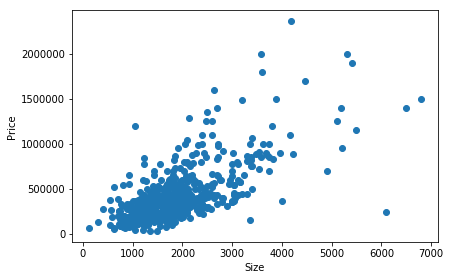

In [0]:
x=data['Size']
y= data['Price']
plt.xlabel('Size')
plt.ylabel('Price')
plt.tight_layout()
plt.scatter(x,y)

In [0]:
def step_gradient(b_current, k_current, train_x, train_y, learning_rate):
    b_grad = 0
    k_grad = 0
    n = len(train_y)
    for i in range(n):
        x = train_x[i]
        y = train_y[i]
        b_grad += (1/n) * (((k_current * x) + b_current) - y)
        k_grad += (1/n) * x * (((k_current * x) + b_current) - y)
    new_b = b_current - (learning_rate * b_grad)
    new_k = k_current - (learning_rate * k_grad)
    return [new_b, new_k]

In [0]:
def run_descent(train_x, train_y, init_b, init_k, num_iters, learning_rate):
    b = init_b
    k = init_k
    for i in range(num_iters):
        b, k = step_gradient(b, k, train_x, train_y, learning_rate)
    return [b, k]

In [0]:
def run():
    file = 'houses.csv'
    points = np.array(np.genfromtxt(file, delimiter=',', skip_header=1))
    learning_rate = 0.0000001  # I've tried .01 - .000001  but only this worked properly

    train_x = points[:,0]  # sizes of the houses
    train_y = points[:,1]  # prices
    init_b = 0
    init_k = 0

    print('{} - number of training examples'.format(len(train_y)))
    print('k = 0, b = 0 | initial parameters')

    num_iters = 200
    [b, k] = run_descent(train_x, train_y, init_b, init_k, num_iters, learning_rate)

    print('k = %.2f, b = %.2f | final parameters' % (k, b))
    drawPlot(train_x, train_y, k, b)


# Before starting Gradient Descent this is how the line fits the data points 

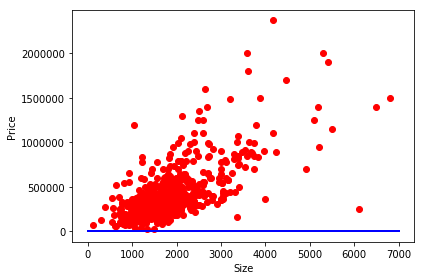

In [0]:
drawPlot(x, y, 0, 0)

779 - number of training examples
k = 0, b = 0 | initial parameters
k = 219.65, b = -0.11 | final parameters


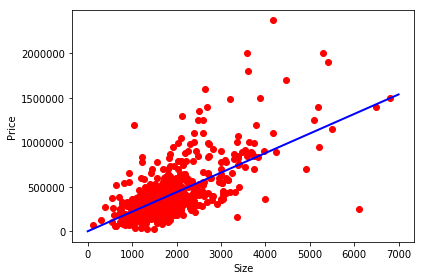

In [0]:
if __name__ == '__main__':
    run()